In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import time

import warnings
warnings.filterwarnings('ignore')

# sklearn

from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.base import BaseEstimator, TransformerMixin

from telcoFunc import *

import features_creation as fc
from features_creation import *

import inspect, re


from tqdm import tqdm
import gc

In [25]:

tcc = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

category_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
                'PaymentMethod']

numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

target = 'Churn'

ID_col = 'customerID'

assert len(category_cols) + len(numeric_cols) + 2 == tcc.shape[1]

tcc['TotalCharges']= tcc['TotalCharges'].apply(lambda x: x if x!= ' ' else np.nan).astype(float)
tcc['MonthlyCharges'] = tcc['MonthlyCharges'].astype(float)

tcc['TotalCharges'] = tcc['TotalCharges'].fillna(0)

tcc['Churn'].replace(to_replace='Yes', value=1, inplace=True)
tcc['Churn'].replace(to_replace='No',  value=0, inplace=True)

In [2]:
train = pd.read_csv('train_new1.csv')
test = pd.read_csv('test_new1.csv')

In [3]:
train.shape

(5282, 27)

In [4]:
X_train = train.iloc[:,:-1]
X_test = test.iloc[:,:-1]
y_train = train.iloc[:,-1]
y_test = test.iloc[:,-1]

In [ ]:
parameter_space = {
    "min_samples_leaf": range(1, 10, 3), 
    "min_samples_split": range(1, 10, 3),
    "max_depth": range(5, 16, 5),
    "max_leaf_nodes": [None] + list(range(20, 70, 20)), 
    "n_estimators": range(10, 160, 70), 
    "max_features":['sqrt', 'log2'] + list(range(3, 9)), 
    "max_samples":[None, 0.4, 0.5, 0.6]}

RF_0 = RandomForestClassifier(random_state=12)
grid_RF_0 = GridSearchCV(RF_0, parameter_space, n_jobs=-1)

grid_RF_0.fit(X_train, y_train)

In [34]:
grid_RF_0.best_score_

0.8091627605286547

In [35]:
grid_RF_0.score(X_train, y_train), grid_RF_0.score(X_test, y_test)

(0.8277167739492617, 0.7950028392958546)

In [36]:
grid_RF_0.best_params_

{'max_depth': 10,
 'max_features': 'log2',
 'max_leaf_nodes': 60,
 'max_samples': 0.5,
 'min_samples_leaf': 7,
 'min_samples_split': 4,
 'n_estimators': 10}

In [ ]:
parameter_space = {
    "min_samples_leaf": range(6, 9), 
    "min_samples_split": range(3, 6),
    "max_depth": range(9, 12),
    "max_leaf_nodes": [None] + list(range(58, 63, 2)), 
    "n_estimators": range(8, 13, 2), 
    "max_features":['sqrt', 'log2'] + list(range(4, 7)), 
    "max_samples":[None, 0.48, 0.5, 0.52]}

RF_0 = RandomForestClassifier(random_state=12)
grid_RF_0 = GridSearchCV(RF_0, parameter_space, n_jobs=-1)

grid_RF_0.fit(X_train, y_train)

In [38]:
grid_RF_0.best_score_

0.8091627605286547

In [39]:
grid_RF_0.score(X_train, y_train), grid_RF_0.score(X_test, y_test)

(0.8277167739492617, 0.7950028392958546)

In [40]:
grid_RF_0.best_params_

{'max_depth': 10,
 'max_features': 'log2',
 'max_leaf_nodes': 60,
 'max_samples': 0.5,
 'min_samples_leaf': 7,
 'min_samples_split': 3,
 'n_estimators': 10}

In [ ]:
parameter_space = {
    "min_samples_leaf": range(6, 9), 
    "min_samples_split": range(2, 5),
    "max_depth": range(9, 12),
    "max_leaf_nodes": [None] + list(range(58, 62)), 
    "n_estimators": range(9, 12), 
    "max_features":['sqrt', 'log2'] + list(range(4, 7)), 
    "max_samples":[0.49, 0.5, 0.51]}

RF_0 = RandomForestClassifier(random_state=12)
grid_RF_0 = GridSearchCV(RF_0, parameter_space, n_jobs=-1)

grid_RF_0.fit(X_train, y_train)

In [42]:
grid_RF_0.best_score_

0.8091627605286547

In [43]:
grid_RF_0.score(X_train, y_train), grid_RF_0.score(X_test, y_test)

(0.8277167739492617, 0.7950028392958546)

In [44]:
grid_RF_0.best_params_

{'max_depth': 10,
 'max_features': 'log2',
 'max_leaf_nodes': 60,
 'max_samples': 0.5,
 'min_samples_leaf': 7,
 'min_samples_split': 2,
 'n_estimators': 10}

In [5]:
from sklearn.ensemble import GradientBoostingClassifier as GBC

In [6]:
params = {
    'n_estimators': range(25,150,25),
    'learning_rate': np.arange(0.1,2.1,0.5).tolist(),
    'subsample': np.arange(0.1,0.8,0.1).tolist(),
    'max_features': ['log2','sqrt','auto']+ list(range(4,7))
}

In [ ]:
gbdt_grid = GridSearchCV(estimator = GBC(random_state = 42),
                        param_grid = params,
                        cv = 5,
                        n_jobs = -1,
                        verbose = False)
gbdt_grid.fit(X_train,y_train)

In [9]:
gbdt_grid.best_score_

0.8106777328631634

In [8]:
gbdt_grid.score(X_train,y_train), gbdt_grid.score(X_test,y_test)

(0.8197652404392276, 0.7859170925610448)

In [10]:
gbdt_grid.best_params_

{'learning_rate': 0.1,
 'max_features': 'log2',
 'n_estimators': 75,
 'subsample': 0.5}

In [11]:
params = {
    'n_estimators': range(60,90,5),
    'learning_rate': np.arange(0.05,0.15,0.01).tolist(),
    'subsample': np.arange(0.45,0.56,0.05).tolist(),
    'max_features': ['log2','sqrt','auto']+ list(range(4,6))
}

In [ ]:
gbdt_grid = GridSearchCV(estimator = GBC(random_state = 42),
                        param_grid = params,
                        cv = 5,
                        n_jobs = -1,
                        verbose = False)
gbdt_grid.fit(X_train,y_train)

In [13]:
gbdt_grid.best_score_

0.812381382414495

In [14]:
gbdt_grid.score(X_train,y_train), gbdt_grid.score(X_test,y_test)

(0.8210904960242332, 0.7915956842703009)

In [15]:
gbdt_grid.best_params_

{'learning_rate': 0.07,
 'max_features': 'log2',
 'n_estimators': 85,
 'subsample': 0.55}

In [18]:
params = {
    'n_estimators': range(83,88),
    'learning_rate': np.arange(0.061,0.08,0.002).tolist(),
    'subsample': np.arange(0.49,0.6,0.02).tolist(),
    'max_features': ['log2','sqrt']
}

In [ ]:
gbdt_grid = GridSearchCV(estimator = GBC(random_state = 42),
                        param_grid = params,
                        cv = 5,
                        n_jobs = -1,
                        verbose = False)
gbdt_grid.fit(X_train,y_train)

In [19]:
gbdt_grid.best_score_

0.8127598119319973

In [20]:
gbdt_grid.score(X_train,y_train), gbdt_grid.score(X_test,y_test)

(0.8195759182127982, 0.7893242475865985)

In [21]:
gbdt_grid.best_params_

{'learning_rate': 0.07100000000000001,
 'max_features': 'log2',
 'n_estimators': 89,
 'subsample': 0.55}

In [22]:
params = {
    'n_estimators': range(88,95),
    'learning_rate': np.arange(0.069,0.073,0.0005).tolist(),
    'subsample': np.arange(0.54,0.56,0.002).tolist(),
    'max_features': ['log2']
}

In [ ]:
gbdt_grid = GridSearchCV(estimator = GBC(random_state = 42),
                        param_grid = params,
                        cv = 5,
                        n_jobs = -1,
                        verbose = False)
gbdt_grid.fit(X_train,y_train)

In [24]:
gbdt_grid.best_score_

0.8133276353888936

In [25]:
gbdt_grid.score(X_train,y_train), gbdt_grid.score(X_test,y_test)

(0.821469140477092, 0.7915956842703009)

In [26]:
gbdt_grid.best_params_

{'learning_rate': 0.07050000000000001,
 'max_features': 'log2',
 'n_estimators': 89,
 'subsample': 0.552}

In [27]:
params = {
    'n_estimators': range(89,90),
    'learning_rate': np.arange(0.07,0.071,0.0001).tolist(),
    'subsample': np.arange(0.55,0.56,0.001).tolist(),
    'max_features': ['log2']
}

In [ ]:
gbdt_grid = GridSearchCV(estimator = GBC(random_state = 42),
                        param_grid = params,
                        cv = 5,
                        n_jobs = -1,
                        verbose = False)
gbdt_grid.fit(X_train,y_train)

In [29]:
gbdt_grid.best_score_

0.8137064232676815

In [30]:
gbdt_grid.score(X_train,y_train), gbdt_grid.score(X_test,y_test)

(0.8218477849299508, 0.7910278250993753)

In [31]:
gbdt_grid.best_params_

{'learning_rate': 0.07070000000000003,
 'max_features': 'log2',
 'n_estimators': 89,
 'subsample': 0.552}

In [32]:
params = {
    'n_estimators': range(89,90),
    'learning_rate': np.arange(0.07,0.071,0.0001).tolist(),
    'subsample': np.arange(0.5515,0.5525,0.0001).tolist(),
    'max_features': ['log2']
}

In [ ]:
gbdt_grid = GridSearchCV(estimator = GBC(random_state = 42),
                        param_grid = params,
                        cv = 5,
                        n_jobs = -1,
                        verbose = False)
gbdt_grid.fit(X_train,y_train)

In [34]:
gbdt_grid.best_score_

0.8137064232676815

In [35]:
gbdt_grid.score(X_train,y_train), gbdt_grid.score(X_test,y_test)

(0.8218477849299508, 0.7910278250993753)

In [36]:
gbdt_grid.best_params_

{'learning_rate': 0.07070000000000003,
 'max_features': 'log2',
 'n_estimators': 89,
 'subsample': 0.5519999999999999}

In [1]:
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 15.2 MB/s eta 0:00:00a 0:00:01


In [5]:
import xgboost as xgb

In [6]:
dtrain = xgb.DMatrix(X_train,y_train)
dtest = xgb.DMatrix(X_test,y_test)

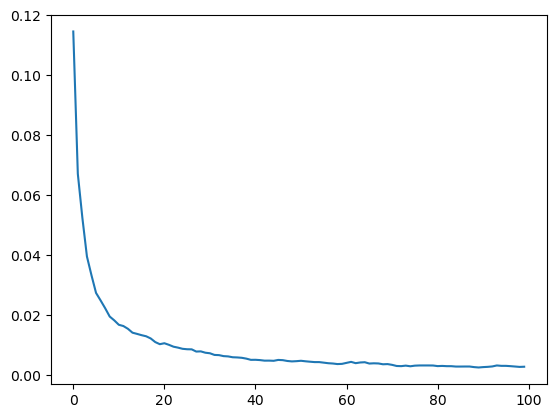

In [33]:
def overfitcheck(result):
    return (result.iloc[-1,2] - result.iloc[-1,0]).min()
train = []
test = []
gamma = np.arange(0,100,1)
overfit = []
for i in gamma:
    params = {"max_depth":5,
              "objective":"binary:logistic",
              "eval_metric":"logloss",
              "seed":1412,"eta":0.1,
              "gamma":float(i)
             }
    result = xgb.cv(params,dtrain,num_boost_round=100
                ,nfold=5 #补充交叉验证中所需的参数，nfold=5表示5折交叉验证
                ,seed=1412 #交叉验证的随机数种子，params中的是管理boosting过程的随机数种子
               )
    overfit.append(overfitcheck(result))
    train.append(result.iloc[-1,0])
    test.append(result.iloc[-1,2])
plt.plot(gamma,overfit);

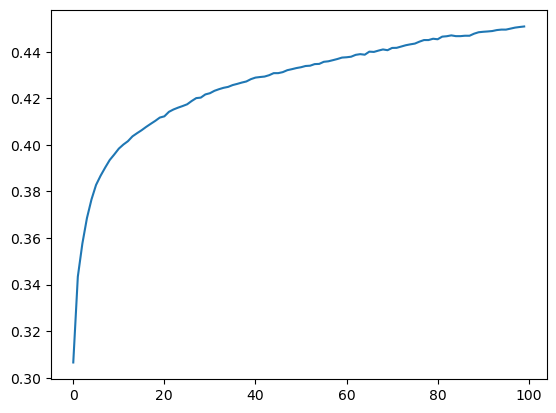

In [34]:
plt.plot(gamma,train);

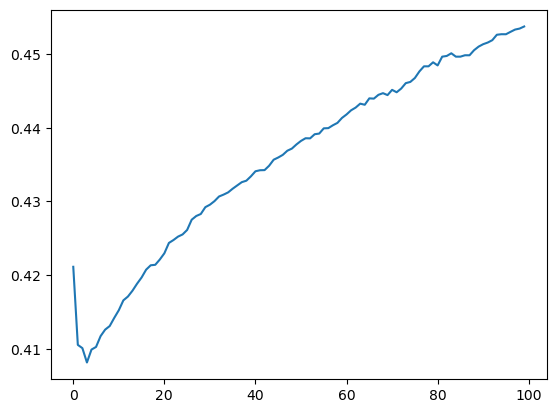

In [35]:
plt.plot(gamma,test);

gamma :0-40

In [36]:
train = []
test = []
lambda_ = np.arange(0,3,0.1)
overfit = []
for i in lambda_:
    params = {"max_depth":5,
              "objective":"binary:logistic",
              "eval_metric":"logloss",
              "seed":1412,"eta":0.1,
              "lambda":float(i)
             }
    result = xgb.cv(params,dtrain,num_boost_round=100
                ,nfold=5 #补充交叉验证中所需的参数，nfold=5表示5折交叉验证
                ,seed=1412 #交叉验证的随机数种子，params中的是管理boosting过程的随机数种子
               )
    
    overfit.append(overfitcheck(result))
    train.append(result.iloc[-1,0])
    test.append(result.iloc[-1,2])

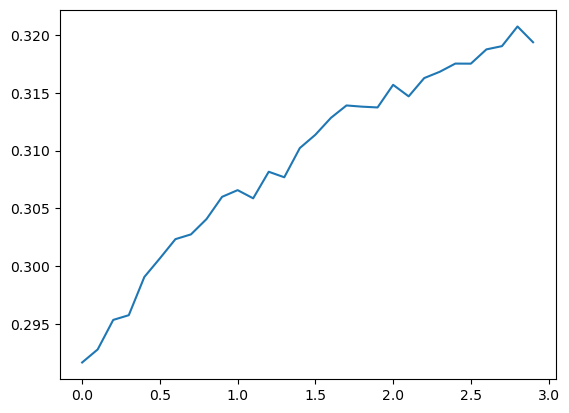

In [37]:
plt.plot(lambda_,train);

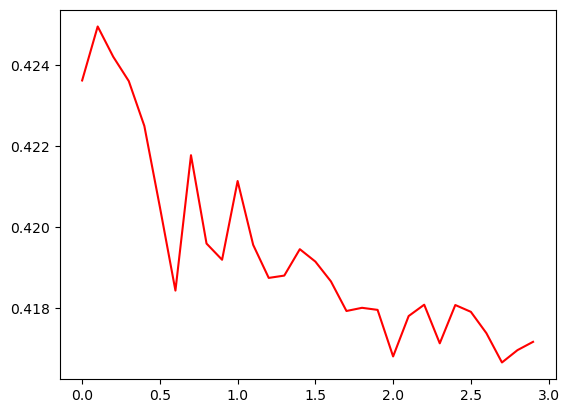

In [38]:
plt.plot(lambda_,test,color="red");

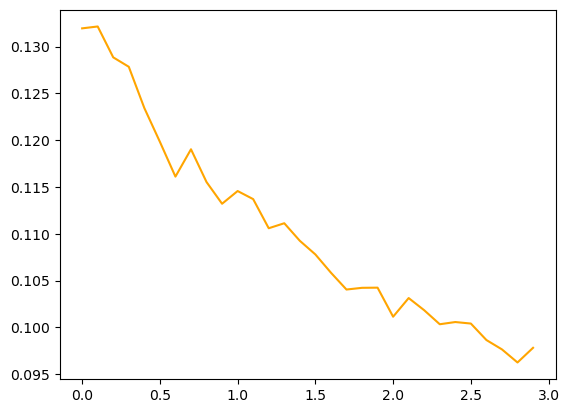

In [39]:
plt.plot(lambda_,overfit,color="orange");

lambda:0-3

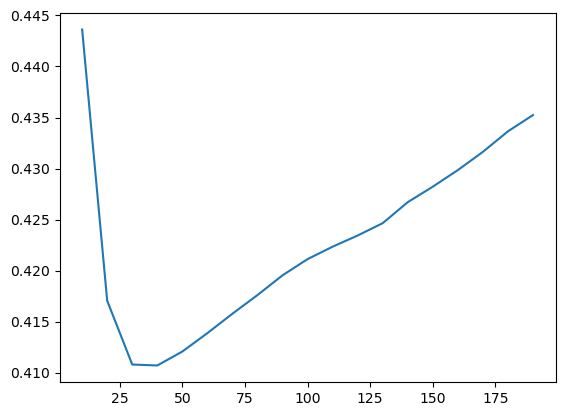

In [40]:
train = []
test = []
option = np.arange(10,200,10)
overfit = []
for i in option:
    params = {"max_depth":5,
              "objective":"binary:logistic",
              "eval_metric":"logloss",
              "seed":1412,"eta":0.1,
            
             }
    result = xgb.cv(params,dtrain,num_boost_round=i
                ,nfold=5 #补充交叉验证中所需的参数，nfold=5表示5折交叉验证
                ,seed=1412 #交叉验证的随机数种子，params中的是管理boosting过程的随机数种子
               )
    overfit.append(overfitcheck(result))
    train.append(result.iloc[-1,0])
    test.append(result.iloc[-1,2])
plt.plot(option,test);

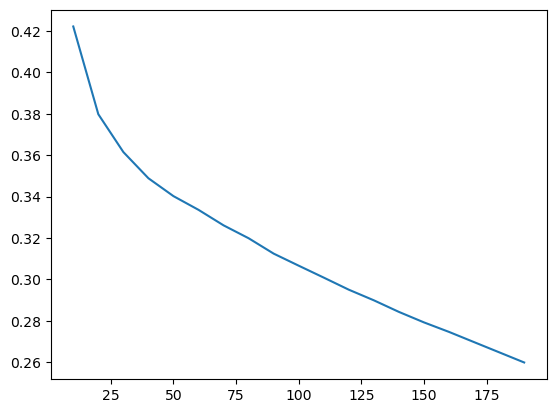

In [41]:
plt.plot(option,train);

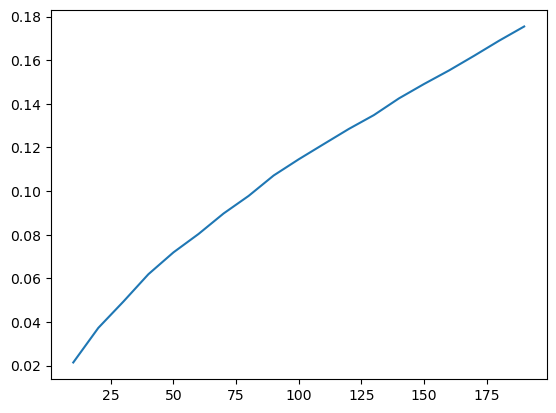

In [42]:
plt.plot(option,overfit);

num_boost_round: 10-100

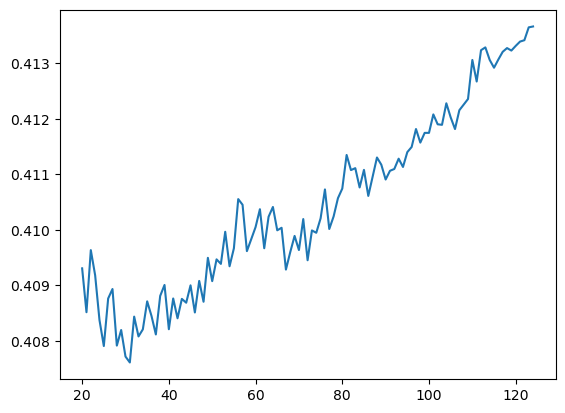

In [47]:
train = []
test = []
option = np.arange(20,125,1)
overfit = []
for i in option:
    params = {"max_depth":5,"seed":1412,"eta":0.1,
              "objective":"binary:logistic",
              "eval_metric":"logloss",
              "min_child_weight":i
             }
    result = xgb.cv(params,dtrain,num_boost_round=50
                ,nfold=5 #补充交叉验证中所需的参数，nfold=5表示5折交叉验证
                ,seed=1412 #交叉验证的随机数种子，params中的是管理boosting过程的随机数种子
               )
    overfit.append(overfitcheck(result))
    train.append(result.iloc[-1,0])
    test.append(result.iloc[-1,2])
plt.plot(option,test);

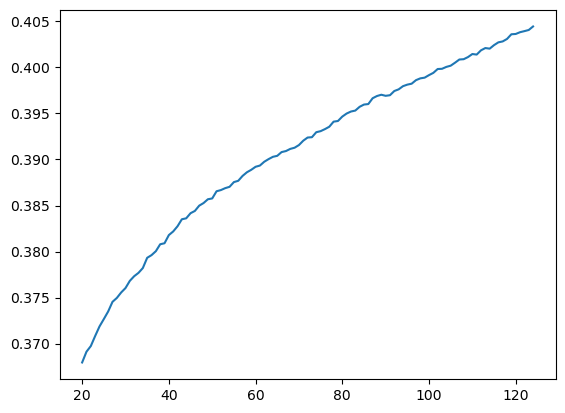

In [48]:
plt.plot(option,train)

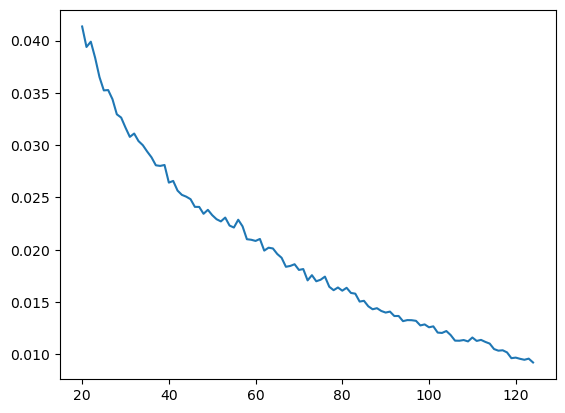

In [49]:
plt.plot(option,overfit)

min_child_weight: 30-150

In [7]:
etas = np.arange(0.1, 2.1, 0.1).tolist()
num_boost_rounds = range(10, 100, 10)


best_params = {'eta': 0, 'num_boost_round': 0}
best_accuracy = 0


for eta in etas:
    for num_boost_round in num_boost_rounds:
        params = {
            'eta': eta, 
            'objective': 'binary:logistic',  
            'eval_metric': 'error'  
        }
        
        cv_results = xgb.cv(
            params,
            dtrain,
            num_boost_round=num_boost_round,
            nfold=5,  
            metrics={'error'},
            seed = 42,
            early_stopping_rounds=10  
        )
        
        mean_accuracy = 1 - cv_results['test-error-mean'].min()
        if mean_accuracy > best_accuracy:
            best_accuracy = mean_accuracy
            best_params['eta'] = eta
            best_params['num_boost_round'] = num_boost_round

print(f"Best parameters: {best_params}, Best accuracy: {best_accuracy}")


Best parameters: {'eta': 0.1, 'num_boost_round': 20}, Best accuracy: 0.8027255167569737


In [8]:
etas = np.arange(0.05, 0.15, 0.01).tolist()
num_boost_rounds = range(10, 30, 2)


best_params = {'eta': 0, 'num_boost_round': 0}
best_accuracy = 0


for eta in etas:
    for num_boost_round in num_boost_rounds:
        params = {
            'eta': eta, 
            'objective': 'binary:logistic',  
            'eval_metric': 'error'  
        }
        
        cv_results = xgb.cv(
            params,
            dtrain,
            num_boost_round=num_boost_round,
            nfold=5,  
            metrics={'error'},
            seed = 42,
            early_stopping_rounds=10  
        )
        
        mean_accuracy = 1 - cv_results['test-error-mean'].min()
        if mean_accuracy > best_accuracy:
            best_accuracy = mean_accuracy
            best_params['eta'] = eta
            best_params['num_boost_round'] = num_boost_round

print(f"Best parameters: {best_params}, Best accuracy: {best_accuracy}")

Best parameters: {'eta': 0.12000000000000002, 'num_boost_round': 14}, Best accuracy: 0.8036723072733006


In [9]:
etas = np.arange(0.11, 0.13, 0.001).tolist()
num_boost_rounds = range(13, 16)


best_params = {'eta': 0, 'num_boost_round': 0}
best_accuracy = 0


for eta in etas:
    for num_boost_round in num_boost_rounds:
        params = {
            'eta': eta, 
            'objective': 'binary:logistic',  
            'eval_metric': 'error'  
        }
        
        cv_results = xgb.cv(
            params,
            dtrain,
            num_boost_round=num_boost_round,
            nfold=5,  
            metrics={'error'},
            seed = 42,
            early_stopping_rounds=10  
        )
        
        mean_accuracy = 1 - cv_results['test-error-mean'].min()
        if mean_accuracy > best_accuracy:
            best_accuracy = mean_accuracy
            best_params['eta'] = eta
            best_params['num_boost_round'] = num_boost_round

print(f"Best parameters: {best_params}, Best accuracy: {best_accuracy}")

Best parameters: {'eta': 0.12000000000000001, 'num_boost_round': 13}, Best accuracy: 0.8036723072733006


In [10]:
1-cv_results['train-error-mean'].min()

0.8393127469567092

In [11]:
gammas = range(0,10,2)
colsample_bytrees = np.arange(0.3,1,0.3).tolist()
colsample_bynodes = np.arange(0.1,1,0.3).tolist()
min_child_weights = range(0,61,15)
lambds = np.arange(0,3,0.5).tolist()
best_params = {'gamma':0,
               'colsample_bytree': 0,
               'colsample_bynode': 0,
               'min_child_weight': 0,
               'lambda': 0}
best_accuracy = 0


for gamma in gammas:
    for colsample_bytree in colsample_bytrees:
        for colsample_bynode in colsample_bynodes:
            for min_child_weight in min_child_weights:
                for lambd in lambds:
                    params = {
                    'gamma':gamma,
                    'colsample_bytree': colsample_bytree,
                    'colsample_bynode': colsample_bynode,
                    'min_child_weight': min_child_weight,
                    'lambda': lambd,
                    'eta':0.12000000000000001,
                    'objective': 'binary:logistic',  
                    'eval_metric': 'error'}
                    
                    cv_results = xgb.cv(
                        params,
                        dtrain,
                        num_boost_round=13,
                        nfold=5, 
                        metrics={'error'},
                        seed = 42,
                        early_stopping_rounds=10)

                    mean_accuracy = 1 - cv_results['test-error-mean'].min()
                    if mean_accuracy > best_accuracy:
                        best_accuracy = mean_accuracy
                        best_params['gamma'] = gamma
                        best_params['colsample_bytree'] = colsample_bytree
                        best_params['colsample_bynode'] = colsample_bynode
                        best_params['min_child_weight'] = min_child_weight
                        best_params['lambda'] = lambd

print(f"Best parameters: {best_params}, Best accuracy: {best_accuracy}")

Best parameters: {'gamma': 2, 'colsample_bytree': 0.8999999999999999, 'colsample_bynode': 0.4, 'min_child_weight': 0, 'lambda': 2.0}, Best accuracy: 0.8048086709096642


In [12]:
gammas = range(1,4)
colsample_bytrees = np.arange(0.8,1,0.02).tolist()
colsample_bynodes = np.arange(0.3,0.5,0.02).tolist()
min_child_weights = range(0,20,4)
lambds = np.arange(1.5,2.5,0.1).tolist()
best_params = {'gamma':0,
               'colsample_bytree': 0,
               'colsample_bynode': 0,
               'min_child_weight': 0,
               'lambda': 0}
best_accuracy = 0


for gamma in gammas:
    for colsample_bytree in colsample_bytrees:
        for colsample_bynode in colsample_bynodes:
            for min_child_weight in min_child_weights:
                for lambd in lambds:
                    params = {
                    'gamma':gamma,
                    'colsample_bytree': colsample_bytree,
                    'colsample_bynode': colsample_bynode,
                    'min_child_weight': min_child_weight,
                    'lambda': lambd,
                    'eta':0.12000000000000001,
                    'objective': 'binary:logistic',  
                    'eval_metric': 'error'}
                    
                    cv_results = xgb.cv(
                        params,
                        dtrain,
                        num_boost_round=13,
                        nfold=5, 
                        metrics={'error'},
                        seed = 42,
                        early_stopping_rounds=10)

                    mean_accuracy = 1 - cv_results['test-error-mean'].min()
                    if mean_accuracy > best_accuracy:
                        best_accuracy = mean_accuracy
                        best_params['gamma'] = gamma
                        best_params['colsample_bytree'] = colsample_bytree
                        best_params['colsample_bynode'] = colsample_bynode
                        best_params['min_child_weight'] = min_child_weight
                        best_params['lambda'] = lambd

print(f"Best parameters: {best_params}, Best accuracy: {best_accuracy}")

Best parameters: {'gamma': 1, 'colsample_bytree': 0.9800000000000002, 'colsample_bynode': 0.4000000000000001, 'min_child_weight': 4, 'lambda': 2.400000000000001}, Best accuracy: 0.8068907499784983


In [13]:
gammas = range(1,2)
colsample_bytrees = np.arange(0.97,0.99,0.002).tolist()
colsample_bynodes = np.arange(0.39,0.41,0.002).tolist()
min_child_weights = range(1,9)
lambds = np.arange(2.3,2.51,0.02).tolist()
best_params = {'gamma':0,
               'colsample_bytree': 0,
               'colsample_bynode': 0,
               'min_child_weight': 0,
               'lambda': 0}
best_accuracy = 0


for gamma in gammas:
    for colsample_bytree in colsample_bytrees:
        for colsample_bynode in colsample_bynodes:
            for min_child_weight in min_child_weights:
                for lambd in lambds:
                    params = {
                    'gamma':gamma,
                    'colsample_bytree': colsample_bytree,
                    'colsample_bynode': colsample_bynode,
                    'min_child_weight': min_child_weight,
                    'lambda': lambd,
                    'eta':0.12000000000000001,
                    'objective': 'binary:logistic',  
                    'eval_metric': 'error'}
                    
                    cv_results = xgb.cv(
                        params,
                        dtrain,
                        num_boost_round=13,
                        nfold=5, 
                        metrics={'error'},
                        seed = 42,
                        early_stopping_rounds=10)

                    mean_accuracy = 1 - cv_results['test-error-mean'].min()
                    if mean_accuracy > best_accuracy:
                        best_accuracy = mean_accuracy
                        best_params['gamma'] = gamma
                        best_params['colsample_bytree'] = colsample_bytree
                        best_params['colsample_bynode'] = colsample_bynode
                        best_params['min_child_weight'] = min_child_weight
                        best_params['lambda'] = lambd

print(f"Best parameters: {best_params}, Best accuracy: {best_accuracy}")

Best parameters: {'gamma': 1, 'colsample_bytree': 0.97, 'colsample_bynode': 0.4, 'min_child_weight': 4, 'lambda': 2.38}, Best accuracy: 0.8068907499784983


In [15]:
gammas = range(1,2)
colsample_bytrees = np.arange(0.961,0.98,0.001).tolist()
colsample_bynodes = np.arange(0.399,0.409,0.001).tolist()
min_child_weights = range(3,6)
lambds = np.arange(2.37,2.389,0.001).tolist()
best_params = {'gamma':0,
               'colsample_bytree': 0,
               'colsample_bynode': 0,
               'min_child_weight': 0,
               'lambda': 0}
best_accuracy = 0


for gamma in gammas:
    for colsample_bytree in colsample_bytrees:
        for colsample_bynode in colsample_bynodes:
            for min_child_weight in min_child_weights:
                for lambd in lambds:
                    params = {
                    'gamma':gamma,
                    'colsample_bytree': colsample_bytree,
                    'colsample_bynode': colsample_bynode,
                    'min_child_weight': min_child_weight,
                    'lambda': lambd,
                    'eta':0.12000000000000001,
                    'objective': 'binary:logistic',  
                    'eval_metric': 'error'}
                    
                    cv_results = xgb.cv(
                        params,
                        dtrain,
                        num_boost_round=13,
                        nfold=5, 
                        metrics={'error'},
                        seed = 42,
                        early_stopping_rounds=10)

                    mean_accuracy = 1 - cv_results['test-error-mean'].min()
                    if mean_accuracy > best_accuracy:
                        best_accuracy = mean_accuracy
                        best_params['gamma'] = gamma
                        best_params['colsample_bytree'] = colsample_bytree
                        best_params['colsample_bynode'] = colsample_bynode
                        best_params['min_child_weight'] = min_child_weight
                        best_params['lambda'] = lambd

print(f"Best parameters: {best_params}, Best accuracy: {best_accuracy}")

Best parameters: {'gamma': 1, 'colsample_bytree': 0.962, 'colsample_bynode': 0.4, 'min_child_weight': 4, 'lambda': 2.3739999999999997}, Best accuracy: 0.8072695378572863


In [19]:
max_depths = range(2,30,2)
subsamples = np.arange(0.1,1.1,0.1)
best_params = {'max_depth':0,
               'subsample': 0}
best_accuracy = 0


for max_depth in max_depths:
    for subsample in subsamples:
        params = {
        'gamma':1,
        'colsample_bytree': 0.962,
        'colsample_bynode': 0.4,
        'min_child_weight': 4,
        'lambda': 2.3739999999999997,
        'eta':0.12000000000000001,
        'max_depth':max_depth,
        'subsample':subsample,
        'objective': 'binary:logistic',  
        'eval_metric': 'error'}
                    
        cv_results = xgb.cv(
                        params,
                        dtrain,
                        num_boost_round=13,
                        nfold=5, 
                        metrics={'error'},
                        seed = 42,
                        early_stopping_rounds=10)

        mean_accuracy = 1 - cv_results['test-error-mean'].min()
        if mean_accuracy > best_accuracy:
            best_accuracy = mean_accuracy
            best_params['max_depth'] = max_depth
            best_params['subsample'] = subsample


print(f"Best parameters: {best_params}, Best accuracy: {best_accuracy}")

Best parameters: {'max_depth': 6, 'subsample': 1.0}, Best accuracy: 0.8072695378572863


|Models|CV.best_score_|
|:--:|:--:|
|Logistic+grid|0.8045|
|RF+grid|0.8092|
|GBDT+grid|0.8137|
|XGBoost+grid|0.8072|